# Tokenizacion #
Para el primer paso, tokenizaremos los titulos de youtobe.

In [16]:
import nltk
import pandas as pd


nltk.download('punkt')
nltk.download('punkt_tab')

# Cargar el archivo CSV
data = pd.read_csv('../data/MXvideos.csv', nrows=40000, encoding='utf-8', on_bad_lines='skip',
                       encoding_errors='replace') 
allReviews = data['title'] 

tokesReview ={}#arreglo de tokens

for iterador, review in enumerate(allReviews):
    
    # Tokenizar la reseña
    tokens = nltk.word_tokenize(review)
    video_id = data.iloc[iterador]['video_id']

    # Asignar los tokens a su 'review_id' correspondiente
    tokesReview[video_id] = tokens

    # Incrementamos el iterador
    iterador += 1

[nltk_data] Downloading package punkt to C:\Users\MARTHA ISABEL
[nltk_data]     VILLAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\MARTHA ISABEL
[nltk_data]     VILLAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# nube de palabras #
Aqui se genera una nube de palabras con base en la cantidad de likes


[nltk_data] Downloading package stopwords to C:\Users\MARTHA ISABEL
[nltk_data]     VILLAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


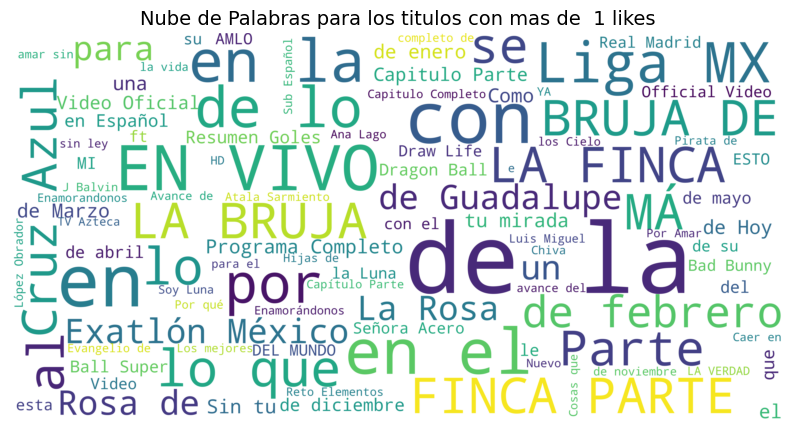

In [17]:
from wordcloud import WordCloud # Importar las bibliotecas necesarias
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')

# Eliminamos los stopwords en inglés
stop_words = set(stopwords.words('english'))  


#creamos un nuevo diccionario que almacena los tokens sin stopwords
tokensTitle_clean={}

# Iterar sobre cada review_id y su lista de tokens
for review_id, tokens in tokesReview.items():
    # Filtrar las stopwords de los tokens para cada reseña
    tokens_clean = [word for word in tokens if word.lower() not in stop_words]
    
    # Almacenar los tokens limpios en el nuevo diccionario con el mismo review_id
    tokensTitle_clean[review_id] = tokens_clean



# Definir la función word_cloud_rating
def word_cloud_rating(data, likes, tokens_clean):

    # Filtrar las reseñas que corresponden a un valor específico de estrellas
    subset_data = data[data['likes'] >= likes]
        
    # Filtrar los tokens correspondientes a cada video_id en el subset_data
    filtered_tokens = []


    # Filtrar los tokens correspondientes a cada video_id en el subset_data
    filtered_tokens = [tokens_clean[row['video_id']] for _, row in subset_data.iterrows()]



    # Unir todas los titulos en un solo texto
    word_cloud_text = ' '.join([' '.join(tokens) for tokens in filtered_tokens])
    
    # Generar la nube de palabras
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", scale=10, width=800, height=400).generate(word_cloud_text)
    
    # Visualizar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Nube de Palabras para los titulos con mas de  {likes} likes', fontsize=14)
    plt.show()

# Llamar a la función para los titulos
word_cloud_rating(data, 1, tokensTitle_clean)